<a href="https://colab.research.google.com/github/svetaepc/Python_START/blob/hw_work/stat_1_2_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [92]:
colnames=[0,1,3,4,5,6,10,22]

In [93]:
# horse_data = 'data/horse_data.csv'
# names = 'data/horse_data.names'

horse_data = '/content/drive/MyDrive/horse_data.csv'
names = '/content/drive/MyDrive/horse_data.names'

df = pd.read_csv(horse_data,header=None)
# df = pd.read_csv(horse_data, names=colnames,header=None)
df.sample(6)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
57,1,1,529640,?,64,36,2,?,2,1,...,42.00,7.70,?,?,2,1,3209,0,0,2
236,2,1,528179,38.20,42,26,1,1,1,1,...,36.00,6.90,?,?,1,2,3111,0,0,2
53,2,1,530544,38.60,40,20,?,?,?,1,...,41.00,6.40,?,?,1,2,3111,0,0,1
137,1,1,534324,38,48,?,1,1,1,1,...,?,?,?,?,1,1,3111,0,0,2
224,1,1,535392,38.8,50,14,1,1,1,1,...,38,58,?,?,1,1,3111,0,0,2
182,1,1,5279822,38.00,?,24,3,3,6,2,...,68.00,7.80,?,?,2,1,2205,0,0,2


In [94]:
colnames=[0,1,3,4,5,6,10,22]

In [95]:
df = df.loc[:,colnames]
df.sample(4)

,0,1,3,4,5,6,10,22
108,1,1,38.7,60,32,4,4,3
245,2,1,?,96,?,3,5,2
144,1,1,37.1,84,40,3,2,3
139,2,1,38,60,32,1,3,1


In [96]:
colnames=['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']

In [97]:
df.columns = colnames
df.sample(4)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
108,1,1,38.7,60,32,4,4,3
226,1,1,39.20,120,20,4,2,2
296,2,1,37.20,72,24,3,4,3
160,1,1,?,?,?,?,4,1


In [98]:
df.rename(columns={'surgery?': 'surgery', 'Age': 'age', 'rectal temperature': 'rectal_temp', 'pulse': 'pulse', 'respiratory rate': 'respiratory_rate', 'temperature of extremities': 'temp_of_extremities ', 'pain': 'pain', 'outcome': 'outcome'}, inplace=True)
df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [99]:
df.dtypes

surgery                 object
age                      int64
rectal_temp             object
pulse                   object
respiratory_rate        object
temp_of_extremities     object
pain                    object
outcome                 object
dtype: object

In [101]:
df.tail()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,outcome
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1
299,1,1,37.2,40,20,?,?,3


In [102]:
df.replace('?', np.NaN, inplace=True)
df.sample(4)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,outcome
202,1,1,37.5,48,40,NaN,NaN,3
188,1,1,38.5,60,NaN,1,NaN,1
222,1,1,NaN,112,13,4,2,1
82,1,9,38.10,100,80,3,3,1


In [103]:
df.isna().sum()

surgery                  1
age                      0
rectal_temp             60
pulse                   24
respiratory_rate        58
temp_of_extremities     56
pain                    55
outcome                  1
dtype: int64

In [ ]:
# C пропущенными значениями.
# Решаем Nan заменить для категориальных - модой, для остальных  - средними
df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,outcome
0,2,1,38.5,66.0,28.0,3,5,2
1,1,1,39.2,88.0,20.0,NaN,3,3
2,2,1,38.3,40.0,24.0,1,3,1
3,1,9,39.1,164.0,84.0,4,2,2
4,2,1,37.3,104.0,35.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,38.0,120.0,70.0,4,2,3
296,2,1,37.2,72.0,24.0,3,4,3
297,1,1,37.5,72.0,30.0,4,4,2
298,1,1,36.5,100.0,24.0,3,3,1


In [104]:
df['temp_of_extremities'] = df['temp_of_extremities '].fillna(value=df['temp_of_extremities '].mode()[0])


In [105]:
df = df.drop('temp_of_extremities ', axis=1)
df.isna().sum()

surgery                 1
age                     0
rectal_temp            60
pulse                  24
respiratory_rate       58
pain                   55
outcome                 1
temp_of_extremities     0
dtype: int64

In [106]:
df.rectal_temp = df.rectal_temp.fillna(value=df.rectal_temp.mode()[0])
df.pulse = pd.to_numeric(df['pulse'], errors='coerce')
df.respiratory_rate = pd.to_numeric(df['respiratory_rate'], errors='coerce')
df.rectal_temp = pd.to_numeric(df['rectal_temp'], errors='coerce')
df.pulse = df.pulse.fillna(value=df.pulse.mean())
df.respiratory_rate = df.respiratory_rate.fillna(value=df.respiratory_rate.mean())
df.temp_of_extremities = df.temp_of_extremities.fillna(value=df.temp_of_extremities.mode()[0])
df.rectal_temp = df.rectal_temp.fillna(value=df.rectal_temp.mean())
df.pain = df.pain.fillna(value=df.pain.mode()[0])
df.sample(5)

,surgery,age,rectal_temp,pulse,respiratory_rate,pain,outcome,temp_of_extremities
229,1,9,38.5,120.0,70.0,3,1,3
127,1,1,37.4,50.0,32.0,4,1,3
21,2,1,38.4,48.0,16.0,1,1,1
155,2,1,38.0,48.0,20.0,1,1,3
280,1,1,38.6,48.0,12.0,1,1,3


In [ ]:
df[df['surgery'].isna()]

,surgery,age,rectal_temp,pulse,respiratory_rate,pain,outcome,temp_of_extremities
132,NaN,1,38.0,48.0,20.0,4,NaN,3


In [ ]:
df[df['outcome'].isna()]

,surgery,age,rectal_temp,pulse,respiratory_rate,pain,outcome,temp_of_extremities
132,NaN,1,38.0,48.0,20.0,4,NaN,3


In [110]:
# df.drop(df.iloc[[132]], inplace=True)
df.drop(index=132,inplace=True)


In [115]:
df.shape
df.isna().sum()
df.dtypes

surgery                 object
age                      int64
rectal_temp            float64
pulse                  float64
respiratory_rate       float64
pain                    object
outcome                 object
temp_of_extremities     object
dtype: object

In [116]:
df.astype('int64')
df.dtypes

surgery                 object
age                      int64
rectal_temp            float64
pulse                  float64
respiratory_rate       float64
pain                    object
outcome                 object
temp_of_extremities     object
dtype: object

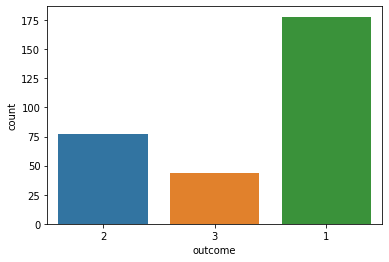

In [117]:
sns.countplot(data=df, x='outcome')

1    178
2     77
3     44
Name: outcome, dtype: int64


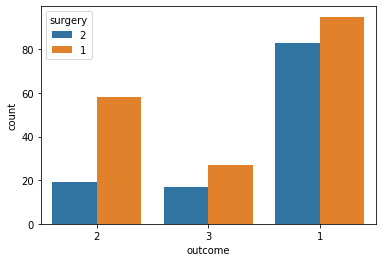

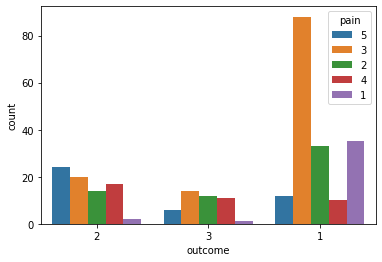

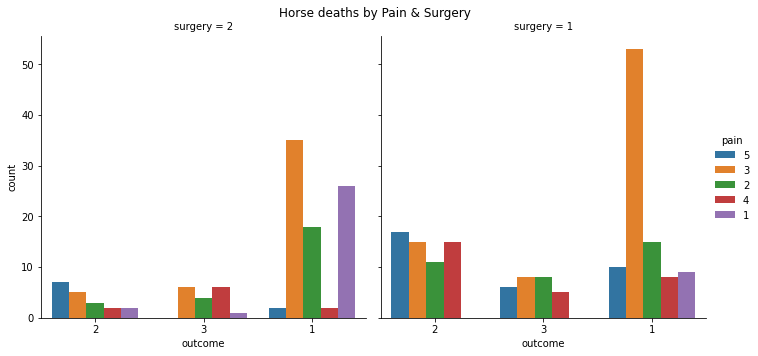

In [119]:
print(df.outcome.value_counts())

sns.countplot(data=df, x='outcome', hue='surgery');
plt.show()

sns.countplot(data=df, x='outcome', hue='pain');
plt.show()

g = sns.catplot(data=df, x='outcome', col='surgery', hue='pain', kind='count');
g.fig.suptitle('Horse deaths by Pain & Surgery');
plt.subplots_adjust(top=0.9)

Text(0.5, 0.98, 'Outcome by Pulse')

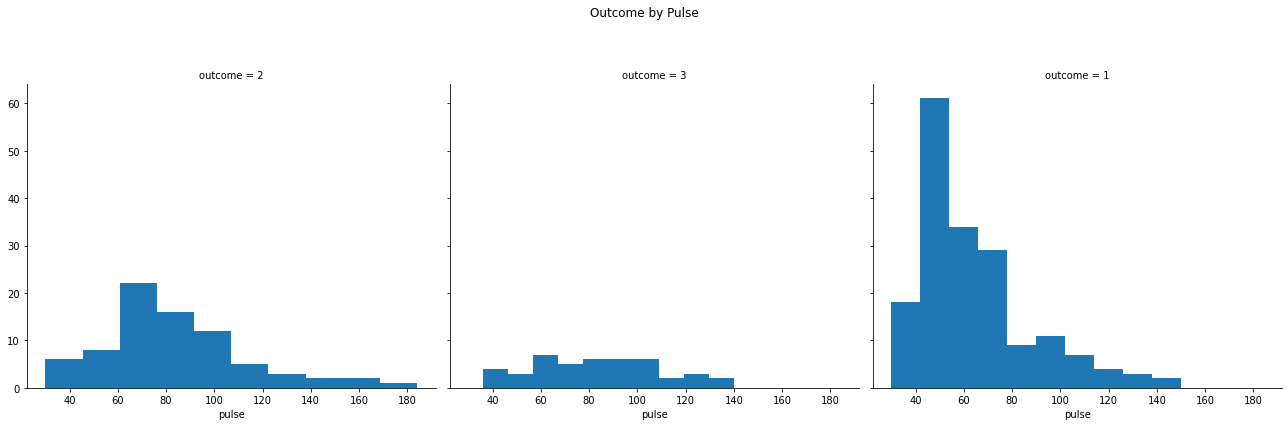

In [120]:
g = sns.FacetGrid(data=df, col='outcome', margin_titles=True, height=6)
g.map(plt.hist, 'pulse')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Outcome by Pulse')